In [1]:
import numpy as np

import matplotlib.pyplot as plt 
import operator
from matplotlib.pyplot import figure

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import time

# About This Data

The CSV file and charts on this site show a relative volume of directions requests per country/region or city compared to a baseline volume on January 13th, 2020.

We define our day as midnight-to-midnight, Pacific time. Cities represent usage in greater metropolitan areas and are stably defined during this period. In many countries/regions and cities, relative volume has increased since January 13th, consistent with normal, seasonal usage of Apple Maps. Day of week effects are important to normalize as you use this data.

Data that is sent from users’ devices to the Maps service is associated with random, rotating identifiers so Apple doesn’t have a profile of your movements and searches. Apple Maps has no demographic information about our users, so we can’t make any statements about the representativeness of our usage against the overall population.

In [7]:
path = './mobility/applemobilitytrends.csv'

mobility = pd.read_csv(path, delimiter = ',', header = 0)

In [8]:
mobility

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27
0,country/region,Albania,driving,NaN,100.0,95.30,101.43,97.20,103.55,112.67,...,22.94,24.55,31.51,33.59,31.69,33.94,30.22,25.22,30.39,37.39
1,country/region,Albania,walking,NaN,100.0,100.68,98.93,98.46,100.85,100.13,...,27.76,27.93,36.72,34.46,35.39,34.80,34.63,29.00,35.22,41.83
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,...,23.19,14.54,26.67,27.25,27.61,28.73,30.99,25.92,16.57,27.45
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,...,17.03,10.59,18.44,19.01,18.47,20.39,22.32,23.31,16.36,18.48
4,country/region,Australia,driving,NaN,100.0,102.98,104.21,108.63,109.08,89.00,...,36.90,53.34,56.93,58.06,59.69,62.87,47.84,41.89,55.39,59.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,sub-region,Île-de-France Region,driving,NaN,100.0,102.06,103.61,110.01,107.47,113.34,...,16.11,15.53,19.42,19.96,20.49,20.81,19.81,17.59,17.29,20.81
1154,sub-region,Örebro County,driving,Örebro län,100.0,101.70,105.33,108.03,115.57,123.96,...,109.73,109.08,103.07,107.73,112.93,107.07,120.65,116.40,114.68,103.28
1155,sub-region,Östergötland County,driving,NaN,100.0,96.87,98.81,103.48,109.64,113.50,...,102.60,101.58,102.81,102.61,109.11,106.38,114.71,117.23,108.38,106.47
1156,sub-region,Ústí nad Labem Region,driving,Ústecký kraj,100.0,101.57,107.63,112.87,120.32,126.19,...,113.68,103.49,101.84,108.48,107.01,108.22,107.30,107.54,119.49,105.89


In [11]:
mobility_ita = mobility[mobility.region == 'Italy']

In [13]:
mobility_ita = mobility_ita.drop(columns = ['geo_type', 'region', 'alternative_name'])

In [21]:
mobility_ita

,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,...,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27
65,driving,100.0,102.63,105.41,106.18,114.69,127.45,110.65,102.59,103.94,...,22.42,19.40,22.62,24.26,25.10,26.26,27.09,21.75,22.82,26.30
66,transit,100.0,100.82,100.40,99.52,107.35,113.33,108.25,102.14,99.04,...,10.60,11.38,12.05,11.96,12.25,11.41,11.36,10.93,13.16,13.35
67,walking,100.0,102.10,104.86,107.32,122.71,142.38,109.49,99.19,102.26,...,19.21,15.37,14.46,16.56,17.21,18.54,20.51,19.33,20.11,19.86


In [85]:
driving = mobility_ita[mobility_ita.transportation_type == 'driving'].T.iloc[1:,:].rename(columns={65: 'driving'})
transit = mobility_ita[mobility_ita.transportation_type == 'transit'].T.iloc[1:,:].rename(columns={66: 'transit'})
walking = mobility_ita[mobility_ita.transportation_type == 'walking'].T.iloc[1:,:].rename(columns={67: 'walking'})

In [94]:
mobility = pd.concat([driving, transit, walking], axis = 1)

In [95]:
mobility

,driving,transit,walking
2020-01-13,100,100,100
2020-01-14,102.63,100.82,102.1
2020-01-15,105.41,100.4,104.86
2020-01-16,106.18,99.52,107.32
2020-01-17,114.69,107.35,122.71
...,...,...,...
2020-04-23,26.26,11.41,18.54
2020-04-24,27.09,11.36,20.51
2020-04-25,21.75,10.93,19.33
2020-04-26,22.82,13.16,20.11


In [96]:
dates = mobility.index.values

In [97]:
dates

array(['2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-

In [115]:
lockdown = '2020-03-10'
pci = '2020-02-24'

lockdown_idx = np.argwhere(dates == lockdown).flatten()[0]
pci_idx = np.argwhere(dates == pci).flatten()[0]

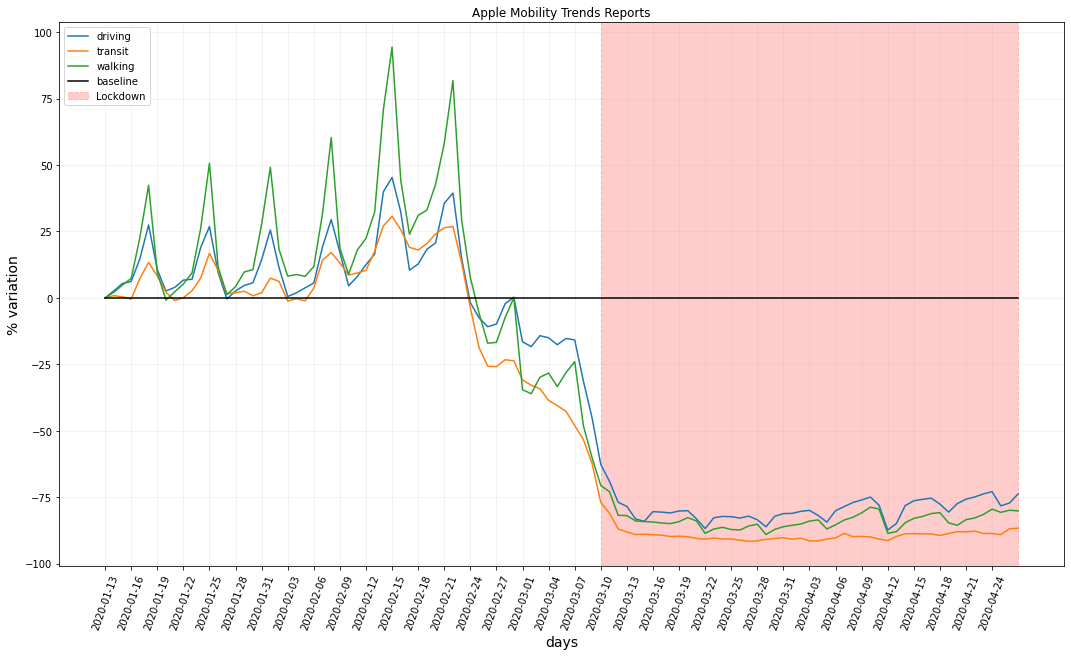

In [116]:
fig = plt.figure(figsize=(18,10))
plt.plot(dates, mobility['driving']-100, label = 'driving')
plt.plot(dates, mobility['transit']-100, label = 'transit')
plt.plot(dates, mobility['walking']-100, label = 'walking')
plt.plot(dates, np.zeros(mobility.shape[0]), label = 'baseline', c = 'black')
plt.axvspan(dates[lockdown_idx], dates[-1], label = 'Lockdown', color = 'r', alpha = 0.2, linestyle = '--')
plt.xticks(dates[0:-1:3], rotation = 70)

plt.title('Apple Mobility Trends Reports')
plt.ylabel('% variation', fontsize = 14)
plt.xlabel('days', fontsize = 14)
plt.grid(alpha = 0.2)
plt.legend()
plt.show()

In [120]:
mobility_pci = mobility.loc[dates[pci_idx:]]

In [121]:
mobility_pci

,driving,transit,walking
2020-02-24,98.2,96.25,107.66
2020-02-25,92.5,81.28,94.26
2020-02-26,89.15,74.29,82.94
2020-02-27,90.16,74.11,83.27
2020-02-28,97.78,76.73,92.59
...,...,...,...
2020-04-23,26.26,11.41,18.54
2020-04-24,27.09,11.36,20.51
2020-04-25,21.75,10.93,19.33
2020-04-26,22.82,13.16,20.11
